**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

**Importing Data**

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving delivery_time (1).csv to delivery_time (1) (1).csv


In [ ]:
dt=pd.read_csv('delivery_time (1).csv')

In [ ]:
dt

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
dt.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
dt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


**Data Cleaning Steps**

**Duplicate Rows:**

In [ ]:
dt.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [ ]:
dt[dt.duplicated()].shape

(0, 2)

In [ ]:
dt[dt.duplicated()]

,Delivery Time,Sorting Time


 **Rename the Columns:**

In [ ]:
dt=dt.rename(columns={'Delivery Time':'Dtime', 'Sorting Time':'Stime'})

In [ ]:
dt

,Dtime,Stime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


**Missing Values:**

In [ ]:
dt.isnull().any

<bound method NDFrame._add_numeric_operations.<locals>.any of     Dtime  Stime
0   False  False
1   False  False
2   False  False
3   False  False
4   False  False
5   False  False
6   False  False
7   False  False
8   False  False
9   False  False
10  False  False
11  False  False
12  False  False
13  False  False
14  False  False
15  False  False
16  False  False
17  False  False
18  False  False
19  False  False
20  False  False>

In [ ]:
dt.isna().sum()

Dtime    0
Stime    0
dtype: int64

**Outlier Detection:**

**zscore Method:**

In [ ]:
dt['zscore']= (dt.Dtime - dt.Dtime.mean())/dt.Dtime.std()

In [ ]:
dt['zscore']

0     0.829385
1    -0.648476
2     0.583075
3     1.420530
4     2.405771
5    -0.283937
6     0.435289
7    -1.436669
8     0.218536
9     0.386027
10    0.598839
11   -1.190359
12   -0.021863
13   -1.042573
14   -0.938137
15   -0.376550
16   -0.599214
17    0.259916
18   -1.732241
19    0.204742
20    0.927909
Name: zscore, dtype: float64

In [ ]:
dt[dt['zscore']>3]

,Dtime,Stime,zscore


In [ ]:
dt[dt['zscore']<-3]

,Dtime,Stime,zscore


**IQR Method**:

In [ ]:
Q1 = dt.Dtime.quantile(0.25)
Q3 = dt.Dtime.quantile(0.75)
Q1,Q3

(13.5, 19.75)

In [ ]:
IQR = Q3 - Q1
IQR

6.25

In [ ]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(4.125, 29.125)

In [ ]:
dt[dt['Dtime']>upper_limit]

,Dtime,Stime,zscore


In [ ]:
dt[dt['Dtime']<lower_limit]

,Dtime,Stime,zscore


In [ ]:
dt[(dt.Dtime<lower_limit) | (dt.Dtime>upper_limit)]

,Dtime,Stime,zscore


In [ ]:
dt

,Dtime,Stime,zscore
0,21.00,10,0.829385
1,13.50,4,-0.648476
2,19.75,6,0.583075
3,24.00,9,1.420530
4,29.00,10,2.405771
5,15.35,6,-0.283937
6,19.00,7,0.435289
7,9.50,3,-1.436669
8,17.90,10,0.218536
9,18.75,9,0.386027


In [ ]:
dt=dt.drop('zscore',axis=1)

In [ ]:
dt

,Dtime,Stime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


**Box Plot:**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


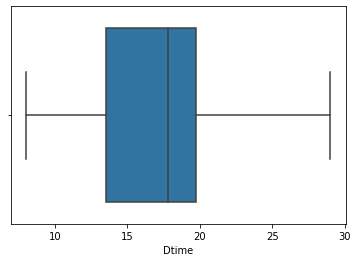

In [ ]:
sns.boxplot(dt['Dtime'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


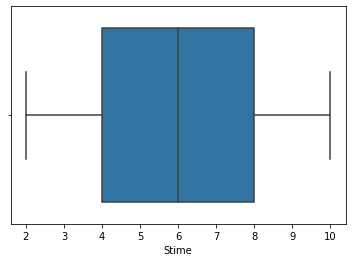

In [ ]:
sns.boxplot(dt['Stime'])

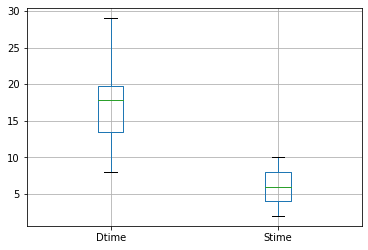

In [ ]:
dt.boxplot(column=['Dtime','Stime'])

**Scatter Plot:**

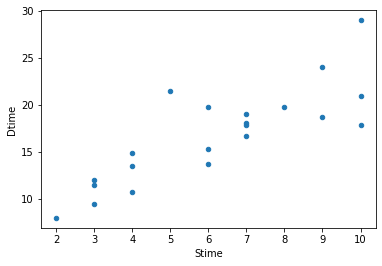

In [ ]:
dt.plot(kind='scatter', x='Stime',y='Dtime')
plt.show()

**Correlation:**

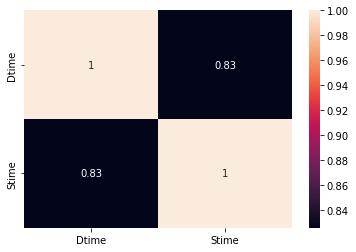

In [ ]:
sns.heatmap(dt.corr(),annot=True)

In [ ]:
dt.corr()

,Dtime,Stime
Dtime,1.000000,0.825997
Stime,0.825997,1.000000


**Observation:**
    From the above data we can observe that the data is positively co-related and it is linear 

**OLS Technique**

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols("Dtime~Stime",data = dt).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Dtime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        12:46:59   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
Stime          1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.params

Intercept    6.582734
Stime        1.649020
dtype: float64

In [ ]:
y= 1.6*10+6.5

In [ ]:
y

22.5

In [ ]:
model.pvalues

Intercept    0.001147
Stime        0.000004
dtype: float64

In [ ]:
model.rsquared

0.6822714748417231

**Log Transform**

In [ ]:
model_log=smf.ols('np.log(Dtime)~np.log(Stime)',data=dt).fit()

In [ ]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(Dtime)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           1.60e-07
Time:                        12:46:59   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Stime)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_log.rsquared

0.77216134926874

**Splitting the Data into Train and Test**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
x = dt.iloc[:,1].values.reshape(-1,1)
y = dt.iloc[:,0].values 

In [ ]:
x

array([[10],
       [ 4],
       [ 6],
       [ 9],
       [10],
       [ 6],
       [ 7],
       [ 3],
       [10],
       [ 9],
       [ 8],
       [ 4],
       [ 7],
       [ 3],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 2],
       [ 7],
       [ 5]])

In [ ]:
y

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

In [ ]:
test_size=0.2
seed=0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
model=LinearRegression()
model.fit(x_train, y_train)
results= model.score(x_test, y_test)

In [ ]:
results

-0.09171780724674217

In [ ]:
results*100.0

-9.171780724674218

**Quantile** **Transform**

In [ ]:
from sklearn.preprocessing import QuantileTransformer

In [ ]:
qt = QuantileTransformer(random_state=0)
qtdf = qt.fit_transform(dt)
qtdf = qt.transform(dt)
df_qtdata = pd.DataFrame(data=qtdf, columns=['Dtime','Stime'])
df_qtdata

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (21). n_quantiles is set to n_samples.
  warnings.warn(


,Dtime,Stime
0,0.85,1.000
1,0.25,0.225
2,0.75,0.450
3,0.95,0.825
4,1.00,1.000
5,0.40,0.450
6,0.70,0.625
7,0.05,0.075
8,0.55,1.000
9,0.65,0.825


In [ ]:
x=df_qtdata[['Dtime']].values

In [ ]:
x

array([[0.85],
       [0.25],
       [0.75],
       [0.95],
       [1.  ],
       [0.4 ],
       [0.7 ],
       [0.05],
       [0.55],
       [0.65],
       [0.8 ],
       [0.1 ],
       [0.45],
       [0.15],
       [0.2 ],
       [0.35],
       [0.3 ],
       [0.6 ],
       [0.  ],
       [0.5 ],
       [0.9 ]])

In [ ]:
y=df_qtdata['Stime'].values

In [ ]:
y

array([1.   , 0.225, 0.45 , 0.825, 1.   , 0.45 , 0.625, 0.075, 1.   ,
       0.825, 0.75 , 0.225, 0.625, 0.075, 0.075, 0.225, 0.45 , 0.625,
       0.   , 0.625, 0.35 ])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model=LinearRegression()
model.fit(x_train, y_train)
results= model.score(x_test, y_test)

In [ ]:
results

0.03992248041971902

In [ ]:
results*100.0

3.992248041971902

**Influence Plot**

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols("Dtime~Stime",data = dt).fit()

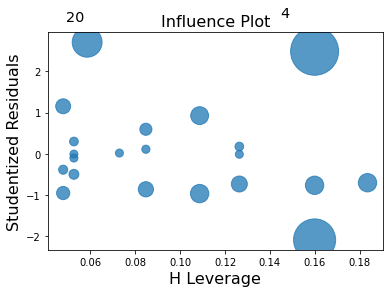

In [ ]:
influence_plot(model)
plt.show()

**Applying Cooks Distance**

In [ ]:
model_influence_V = model.get_influence()
(c, _) = model_influence_V.cooks_distance


<ipython-input-106-318591ae80bc>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(dt)), np.round(c, 3))


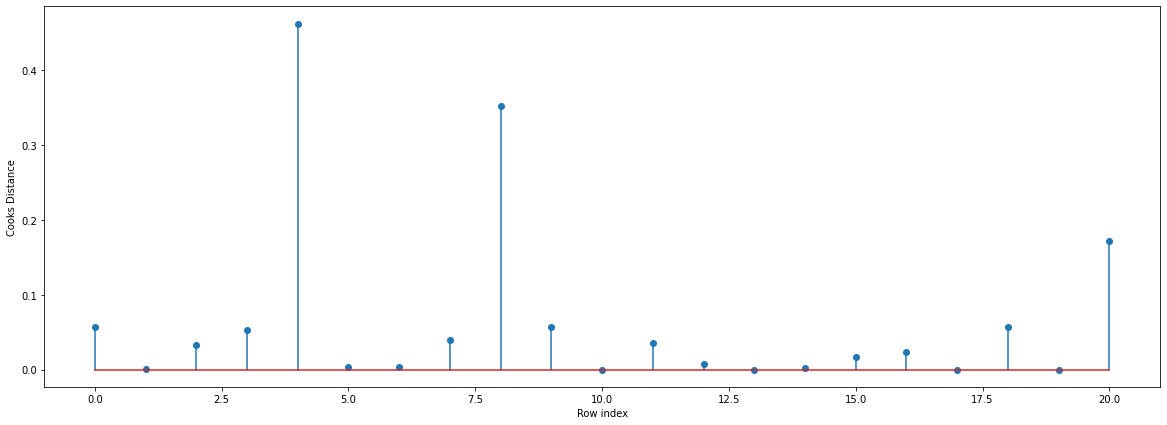

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(dt)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
(np.argmax(c),np.max(c))

(4, 0.462053041265031)

In [ ]:
dt1=dt.drop(dt.index[[8,20,4]],axis=0).reset_index()

In [ ]:
dt1

,index,Dtime,Stime
0,0,21.00,10
1,1,13.50,4
2,2,19.75,6
3,3,24.00,9
4,5,15.35,6
5,6,19.00,7
6,7,9.50,3
7,9,18.75,9
8,10,19.83,8
9,11,10.75,4


In [ ]:
modelnew1=smf.ols('Dtime~Stime',data=dt1).fit()

In [ ]:
modelnew1.summary()

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Dtime   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     79.94
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           1.27e-07
Time:                        12:47:00   Log-Likelihood:                -35.450
No. Observations:                  18   AIC:                             74.90
Df Residuals:                      16   BIC:                             76.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0240      1.175      5.126      0.000       3.533       8.515
Stime          1.6741      0.187      8.941      0.000       1.277       2.071
==============================================================================
Omnibus:                        1.044   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.593   Jarque-Bera (JB):                0.959
Skew:                           0.447   Prob(JB):                        0.619
Kurtosis:                       2.307   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
modelnew1.rsquared

0.8332330202945817

**OBSERVATION:**

From the given data set by using cooks distance and applying transformation we got accuracy of 83%